In [4]:
import pandas as pd
from typing import List
import numpy as np
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
!pip install unzip

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1287 sha256=3c00ed24c250fc3e10c90db712cde9148ac65effaf0da9f24a34279de6538cee
  Stored in directory: c:\users\adars\appdata\local\pip\cache\wheels\3c\4d\b3\ddd83a91322fba02a91898d3b006090d1df1d3b0ad61bd8b36
Successfully built unzip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
!pip install zipfile

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for zipfile


In [18]:
import shutil

shutil.unpack_archive('./heart-disease-prediction-using-logistic-regression.zip', './dataset', 'zip')

In [20]:
df = pd.read_csv('./dataset/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [22]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [37]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [48]:
unique_values = {col: df[col].unique().tolist() for col in df.columns}
print(unique_values)


{'male': [1, 0], 'age': [39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 60, 35, 36, 59, 54, 37, 56, 53, 49, 65, 51, 62, 40, 67, 57, 66, 64, 55, 58, 34, 68, 33, 70, 32, 69], 'education': [4.0, 2.0, 1.0, 3.0, nan], 'currentSmoker': [0, 1], 'cigsPerDay': [0.0, 20.0, 30.0, 23.0, 15.0, 9.0, 10.0, 5.0, 35.0, 43.0, 1.0, 40.0, 3.0, 2.0, nan, 12.0, 4.0, 18.0, 25.0, 60.0, 14.0, 45.0, 8.0, 50.0, 13.0, 11.0, 7.0, 6.0, 38.0, 29.0, 17.0, 16.0, 19.0, 70.0], 'BPMeds': [0.0, 1.0, nan], 'prevalentStroke': [0, 1], 'prevalentHyp': [0, 1], 'diabetes': [0, 1], 'totChol': [195.0, 250.0, 245.0, 225.0, 285.0, 228.0, 205.0, 313.0, 260.0, 254.0, 247.0, 294.0, 332.0, 226.0, 221.0, 232.0, 291.0, 190.0, 185.0, 234.0, 215.0, 270.0, 272.0, 295.0, 209.0, 175.0, 214.0, 257.0, 178.0, 233.0, 180.0, 243.0, 237.0, nan, 311.0, 208.0, 252.0, 261.0, 179.0, 194.0, 267.0, 216.0, 240.0, 266.0, 255.0, 220.0, 235.0, 212.0, 223.0, 300.0, 302.0, 248.0, 200.0, 189.0, 258.0, 202.0, 213.0, 183.0, 274.0, 170.0, 210.0, 197.0, 32

In [ ]:
education
BPMeds
totChol
glucose
BMI
heartrate


In [36]:
df['education'].unique()

array([ 4.,  2.,  1.,  3., nan])

(array([1572., 2097.,  127.,   16.,   13.,    6.,    7.,    4.,    3.,
           5.]),
 array([ 40. ,  75.4, 110.8, 146.2, 181.6, 217. , 252.4, 287.8, 323.2,
        358.6, 394. ]),
 <BarContainer object of 10 artists>)

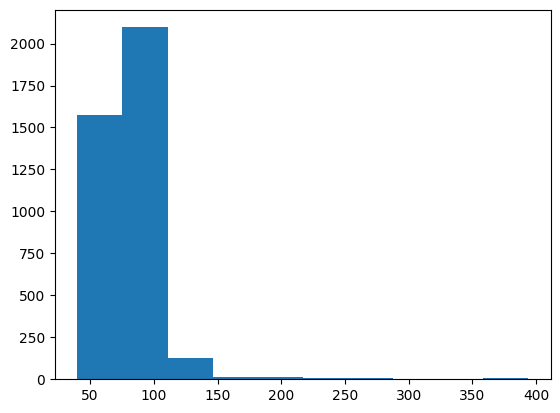

In [49]:
plt.hist(df['glucose'])

<Axes: ylabel='glucose'>

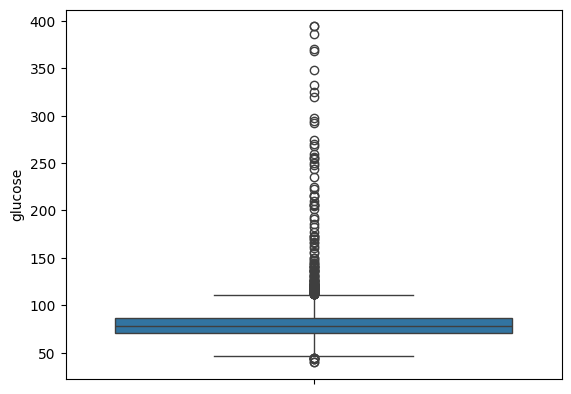

In [52]:
sns.boxplot(df['glucose'])

In [53]:
missing_percent_glucose = df['glucose'].isnull().mean() * 100
print(f"Missing_glucose: {missing_percent_glucose:.2f}%")


Missing_glucose: 9.16%


In [77]:
median_val_glucose = df['glucose'].median()
df['glucose'].fillna(median_val_glucose, inplace=True)
df['glucose'].isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
4233    False
4234    False
4235    False
4236    False
4237    False
Name: glucose, Length: 4238, dtype: bool>

<Axes: ylabel='totChol'>

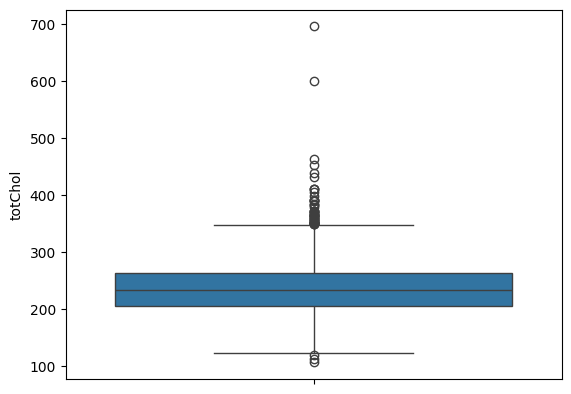

In [72]:
sns.boxplot(df['totChol'])

In [73]:
missing_percent_glucose = df['totChol'].isnull().mean() * 100
print(f"Missing_totChol: {missing_percent_glucose:.2f}%")

Missing_totChol: 1.18%


(array([1.640e+02, 1.553e+03, 1.898e+03, 5.030e+02, 6.000e+01, 7.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([107. , 165.9, 224.8, 283.7, 342.6, 401.5, 460.4, 519.3, 578.2,
        637.1, 696. ]),
 <BarContainer object of 10 artists>)

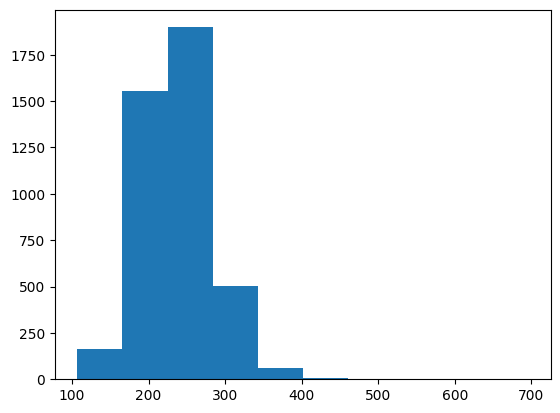

In [74]:
plt.hist(df['totChol'])

In [76]:
median_val_totChol = df['totChol'].median()
df['totChol'].fillna(median_val_totChol, inplace=True)
df['totChol'].isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
4233    False
4234    False
4235    False
4236    False
4237    False
Name: totChol, Length: 4238, dtype: bool>

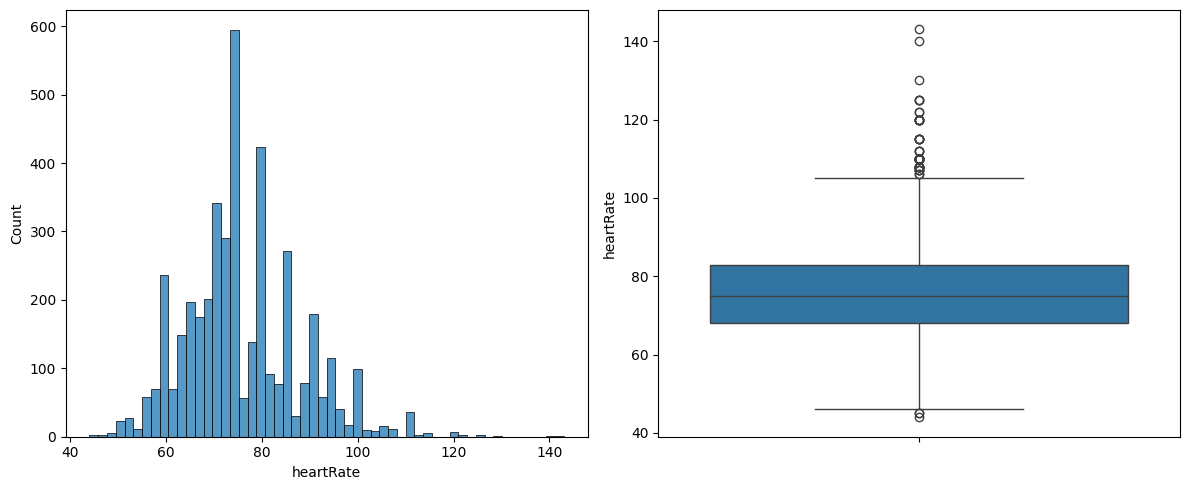

In [85]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(df['heartRate'], ax=axs[0])

sns.boxplot(df['heartRate'], ax=axs[1])

plt.tight_layout()
plt.show()

In [88]:
median_val_heartRate = df['heartRate'].median()
df['heartRate'].fillna(median_val_heartRate, inplace=True)

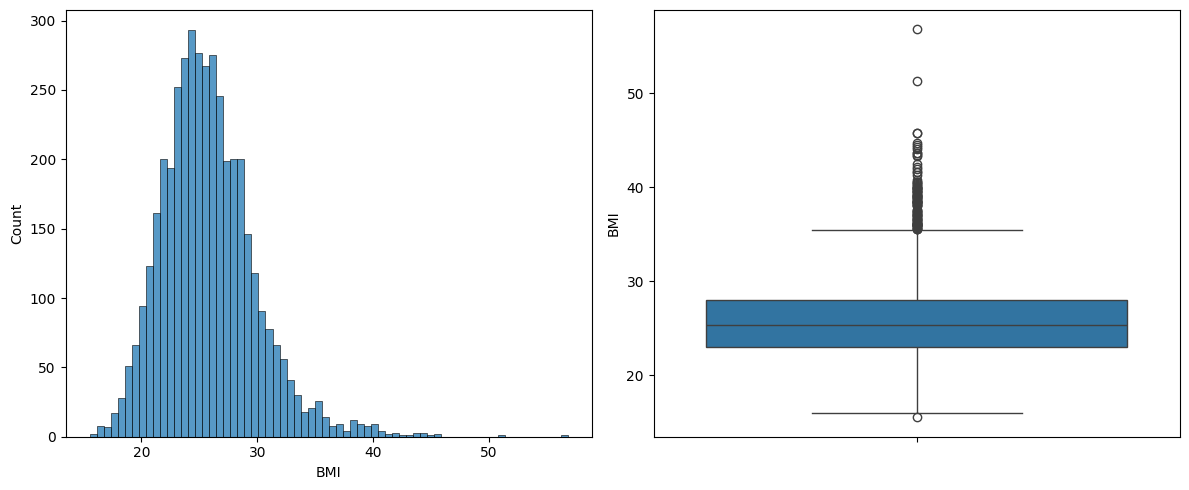

In [86]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(df['BMI'], ax=axs[0])

sns.boxplot(df['BMI'], ax=axs[1])

plt.tight_layout()
plt.show()

In [87]:
median_val_BMI = df['BMI'].median()
df['BMI'].fillna(median_val_BMI, inplace=True)

In [89]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

<Axes: ylabel='TenYearCHD'>

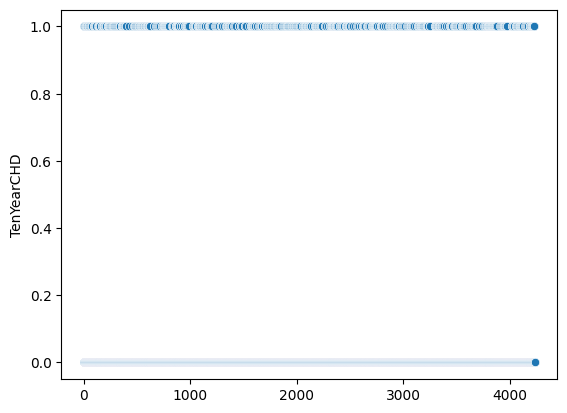

In [103]:
sns.scatterplot(df['TenYearCHD'])

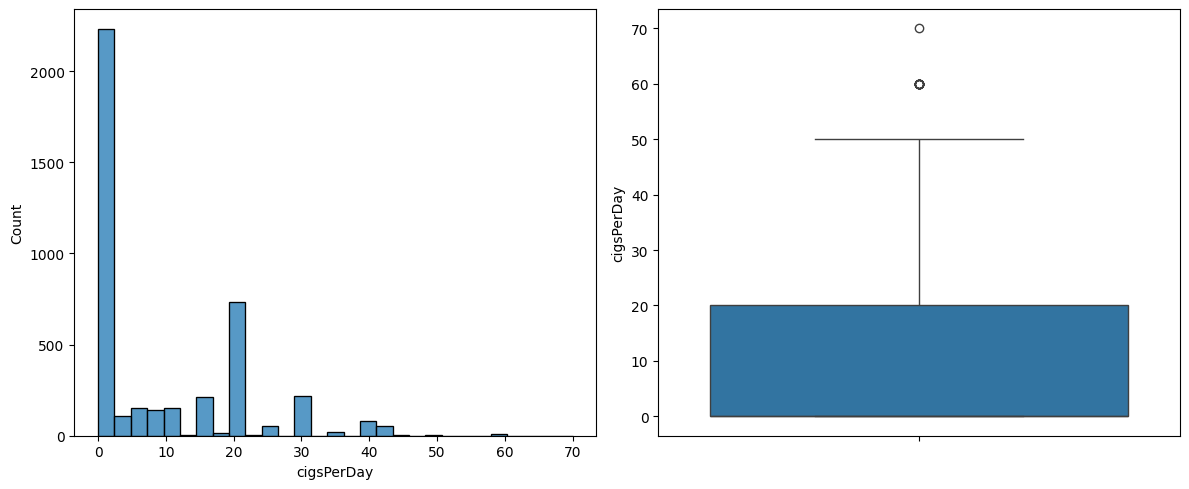

In [90]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(df['cigsPerDay'], ax=axs[0])

sns.boxplot(df['cigsPerDay'], ax=axs[1])

plt.tight_layout()
plt.show()

In [91]:
df['cigsPerDay'].value_counts()

cigsPerDay
0.0     2144
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: count, dtype: int64

In [93]:
median_val_cigsPerDay = df['cigsPerDay'].median()
df['BMI'].fillna(median_val_cigsPerDay, inplace=True)

In [ ]:
df_rev = df.dropna()

In [101]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4053 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4053 non-null   int64  
 1   age              4053 non-null   int64  
 2   education        4053 non-null   float64
 3   currentSmoker    4053 non-null   int64  
 4   cigsPerDay       4053 non-null   float64
 5   BPMeds           4053 non-null   float64
 6   prevalentStroke  4053 non-null   int64  
 7   prevalentHyp     4053 non-null   int64  
 8   diabetes         4053 non-null   int64  
 9   totChol          4053 non-null   float64
 10  sysBP            4053 non-null   float64
 11  diaBP            4053 non-null   float64
 12  BMI              4053 non-null   float64
 13  heartRate        4053 non-null   float64
 14  glucose          4053 non-null   float64
 15  TenYearCHD       4053 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 538.3 KB


<Axes: >

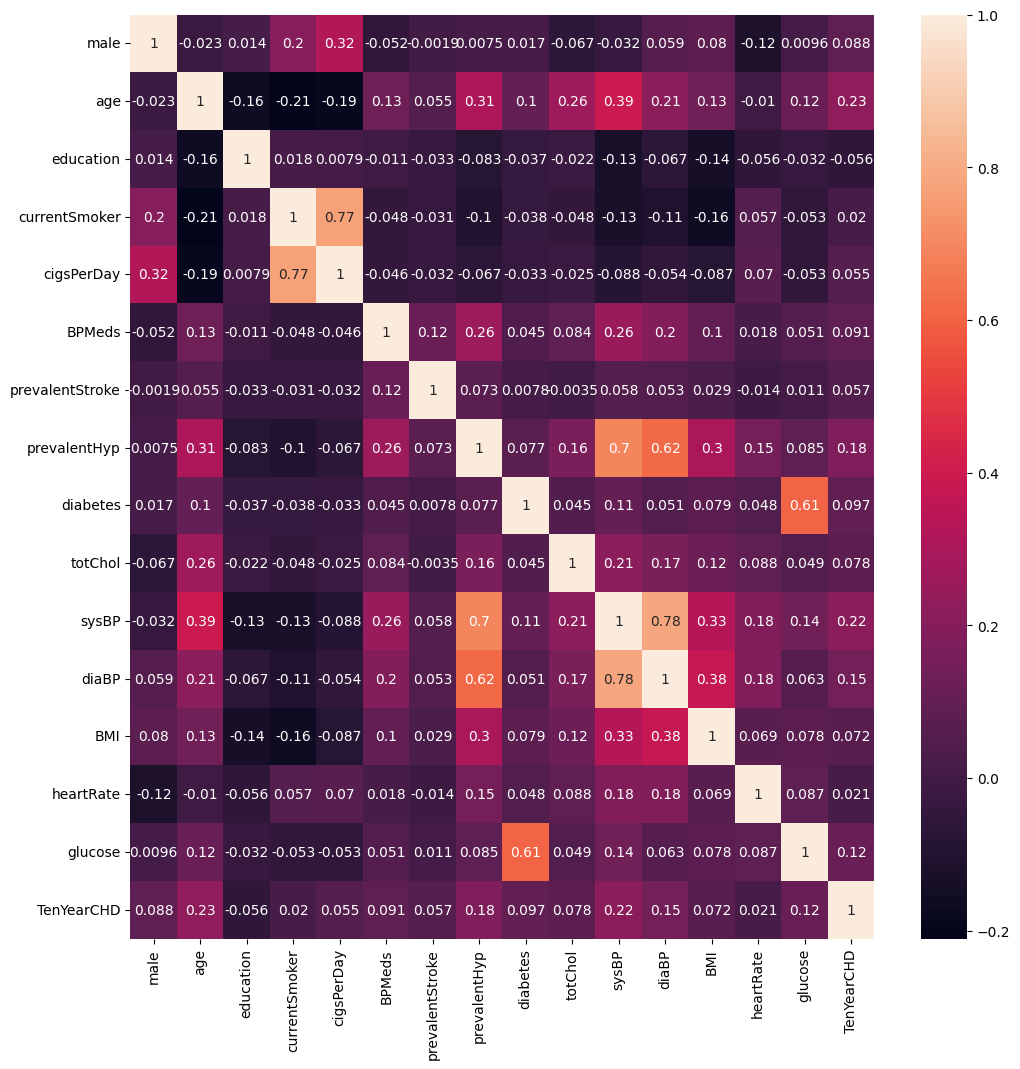

In [119]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_rev.corr(),annot=True)

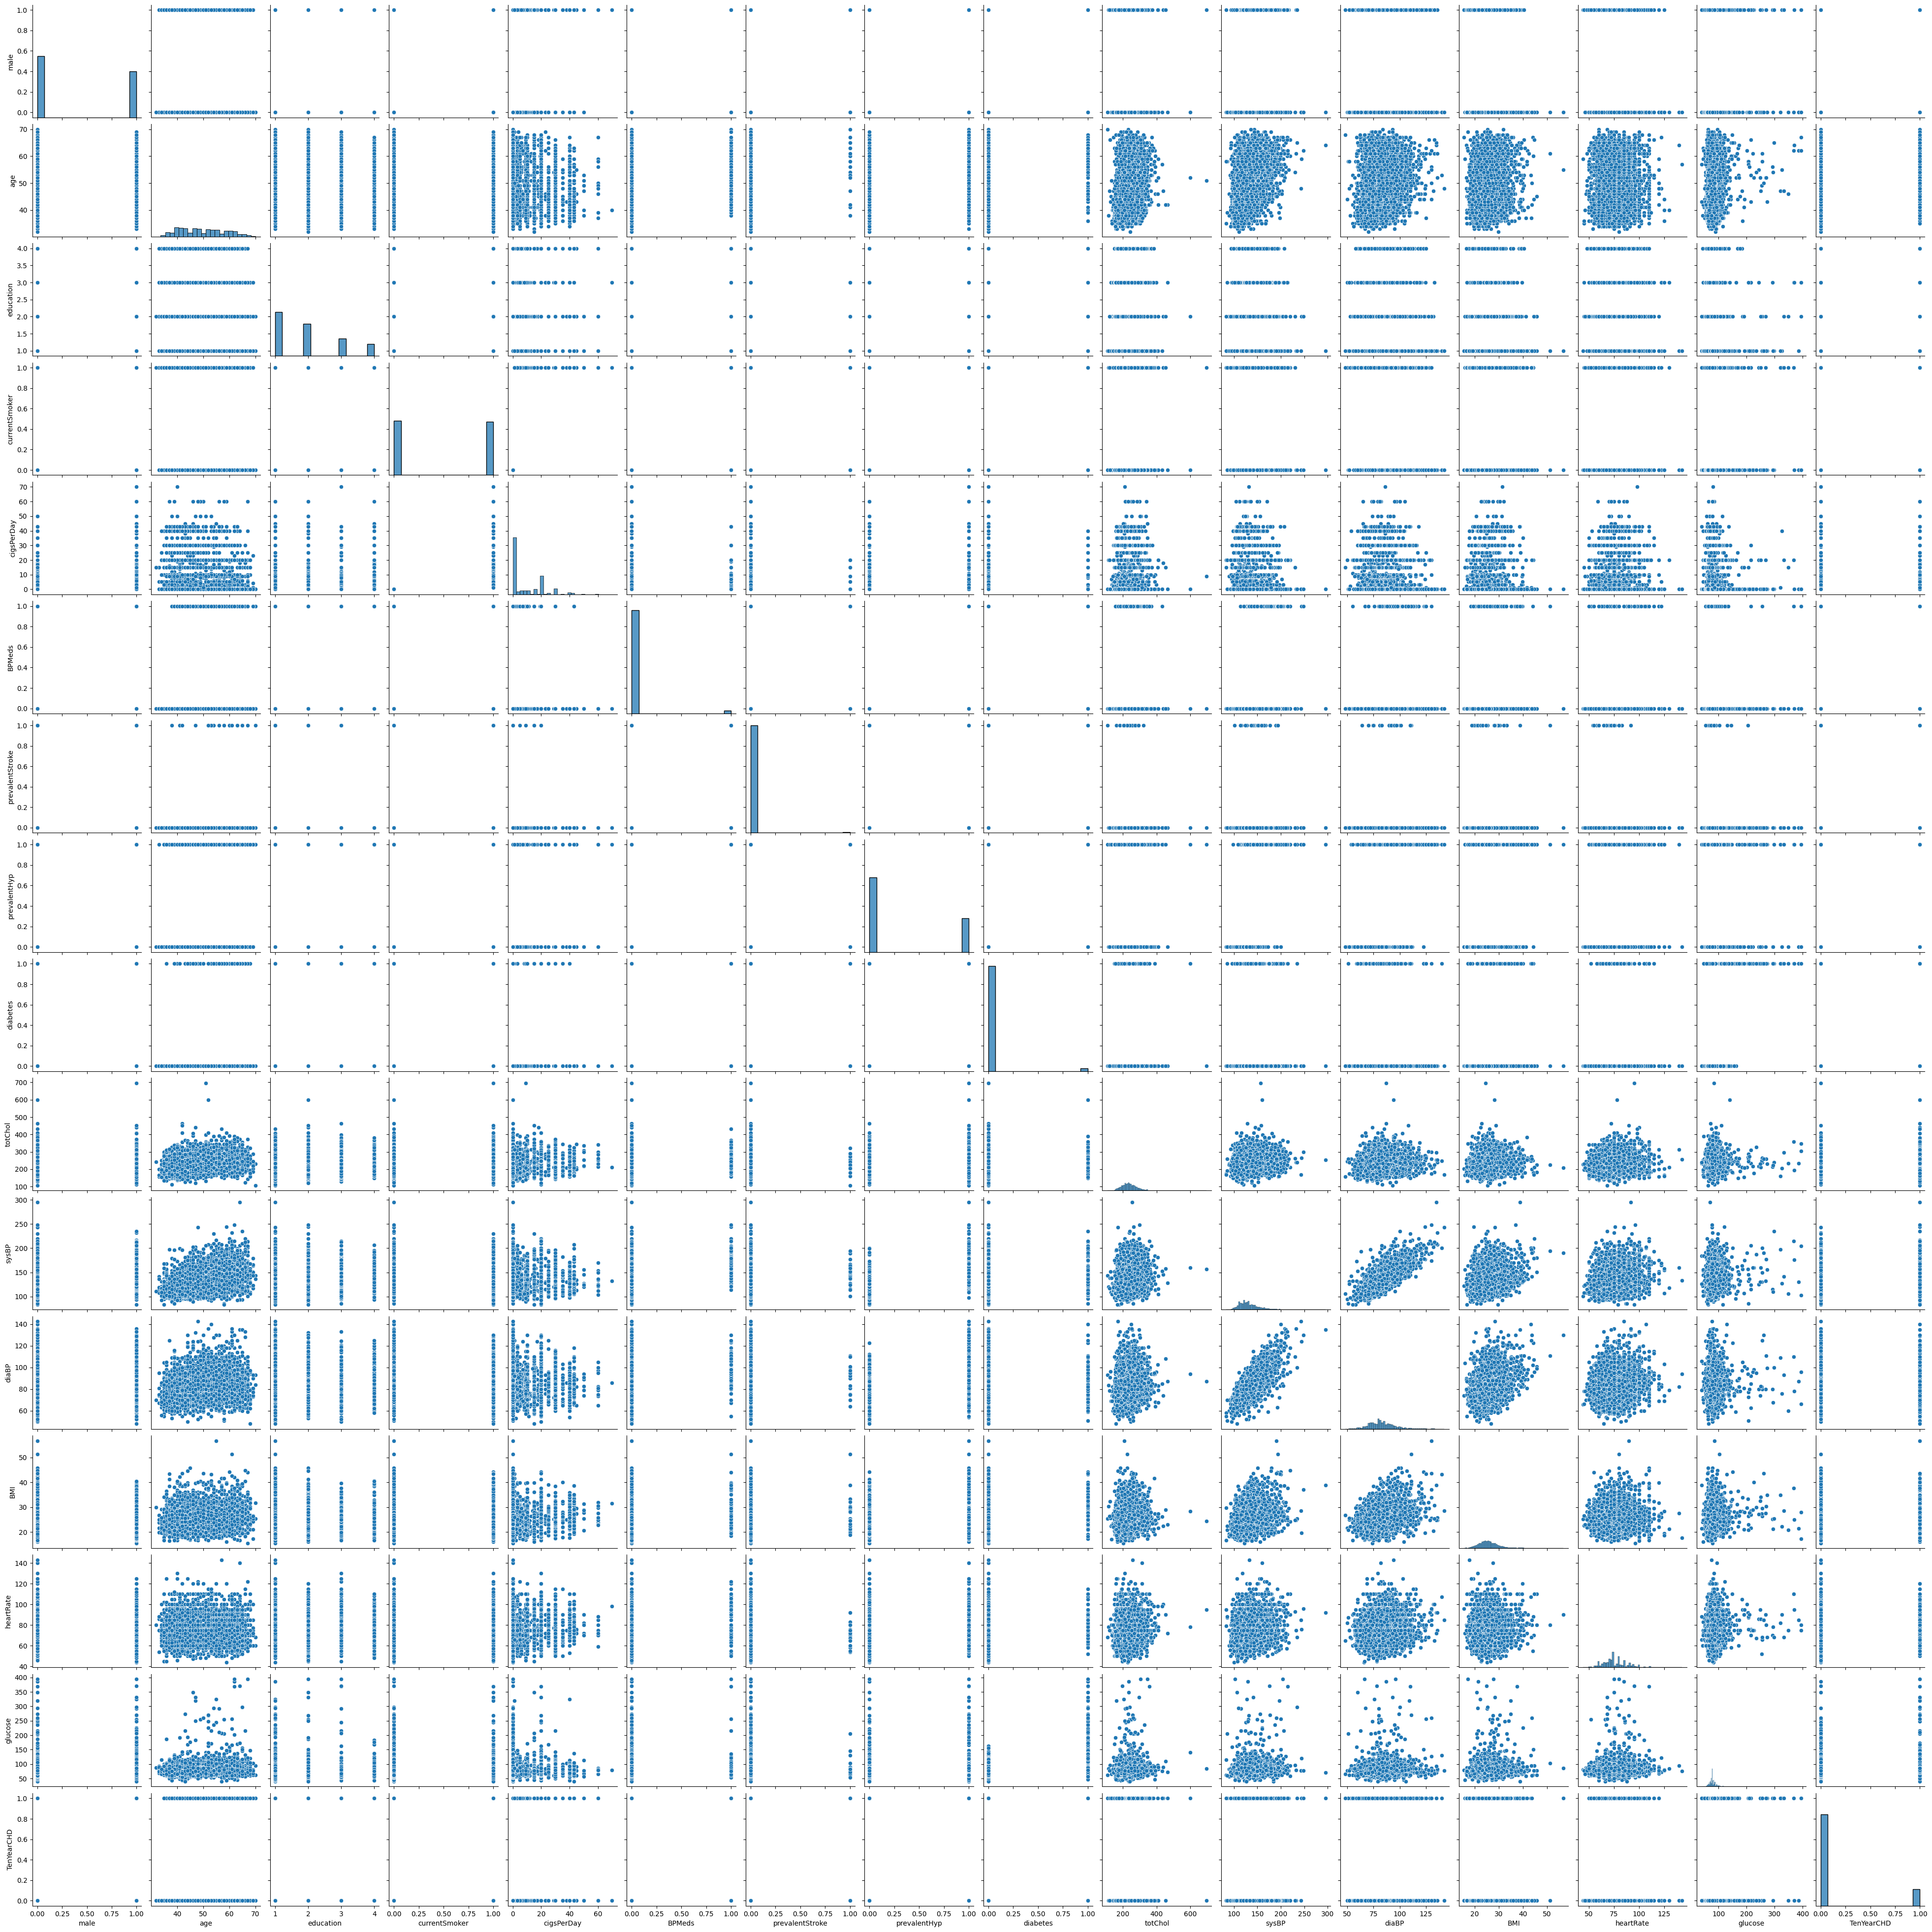

In [113]:
sns.pairplot(df)

In [105]:
X= df_rev.drop('TenYearCHD',axis=1)
y= df_rev['TenYearCHD']

In [106]:
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X includes the constant
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            feature         VIF
0              male    2.095417
1               age   40.851638
2         education    4.660755
3     currentSmoker    4.896582
4        cigsPerDay    4.230253
5            BPMeds    1.135451
6   prevalentStroke    1.025547
7      prevalentHyp    2.381977
8          diabetes    1.569519
9           totChol   32.360114
10            sysBP  136.543236
11            diaBP  135.843188
12              BMI   45.049063
13        heartRate   38.317180
14          glucose   20.644469


### Class_weight optimisation

In [225]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,train_size=0.75,random_state=42,stratify=y)
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [226]:
X_train_scaled.shape

(3039, 15)

In [227]:
X_test_scaled.shape

(1014, 15)

In [228]:
log_reg = LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [229]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [214]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

In [218]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=log_reg,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [230]:
grid.fit(X_train_scaled,y_train)

c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adars\A

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [231]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 1, 1: 1},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [232]:
y_pred=grid.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [233]:
score=accuracy_score(y_pred=y_pred,y_true=y_test)
print(score)


0.8550295857988166


In [234]:
print(classification_report(y_pred=y_pred,y_true=y_test))


              precision    recall  f1-score   support

           0       0.86      0.99      0.92       860
           1       0.67      0.09      0.16       154

    accuracy                           0.86      1014
   macro avg       0.76      0.54      0.54      1014
weighted avg       0.83      0.86      0.81      1014



In [235]:
print(confusion_matrix(y_pred=y_pred,y_true=y_test))

[[853   7]
 [140  14]]


### Outsampling

In [154]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [155]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)


In [191]:
X_res.shape

(6876, 15)

In [157]:
y_res.value_counts()

TenYearCHD
0    3438
1    3438
Name: count, dtype: int64

In [187]:
X_res_train,X_res_test,y_res_train,y_res_test=train_test_split(X_res,y_res,test_size=0.25,train_size=0.75,random_state=42)
std_scaler = StandardScaler()
X_res_train_scaled = std_scaler.fit_transform(X_res_train)
X_res_test_scaled = std_scaler.transform(X_res_test)

In [188]:
log_reg_res = LogisticRegression()

In [205]:
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [206]:
params_res=dict(penalty=penalty,C=c_values,solver=solver, class_weight=class_weight)
params_res

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [207]:
grid_res=GridSearchCV(estimator=log_reg_res,param_grid=params_res,scoring='accuracy',cv=cv,n_jobs=-1)

In [208]:
grid_res.fit(X_res_train_scaled,y_res_train)

c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\adars\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\adars\A

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [209]:
grid_res.best_params_

{'C': 10, 'class_weight': {0: 10, 1: 10}, 'penalty': 'l2', 'solver': 'sag'}

In [210]:
y_pred=grid_res.predict(X_res_test_scaled)
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [211]:
score=accuracy_score(y_pred=y_pred,y_true=y_res_test)
print(score)

0.6527050610820244


In [212]:
print(classification_report(y_pred=y_pred,y_true=y_res_test))


              precision    recall  f1-score   support

           0       0.66      0.65      0.66       880
           1       0.64      0.65      0.65       839

    accuracy                           0.65      1719
   macro avg       0.65      0.65      0.65      1719
weighted avg       0.65      0.65      0.65      1719

